In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
df=pd.read_csv('hepatitis_csv.csv')
df.head(5)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [132]:
df.shape

(155, 20)

In [133]:
df.isnull()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
151,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
152,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
153,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


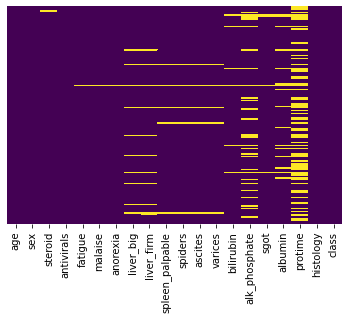

In [136]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [48]:
new_data = df.dropna(axis = 0, how ='any')  

In [49]:
new_data

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.9,95.0,28.0,4.0,75.0,False,live
10,39,female,False,True,False,False,False,False,True,False,False,False,False,1.3,78.0,30.0,4.4,85.0,False,live
11,32,female,True,True,True,False,False,True,True,False,True,False,False,1.0,59.0,249.0,3.7,54.0,False,live
12,41,female,True,True,True,False,False,True,True,False,False,False,False,0.9,81.0,60.0,3.9,52.0,False,live
13,30,female,True,False,True,False,False,True,True,False,False,False,False,2.2,57.0,144.0,4.9,78.0,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,45,female,True,True,False,False,False,True,False,False,False,False,False,1.3,85.0,44.0,4.2,85.0,True,live
143,49,female,False,False,True,True,False,True,False,True,True,False,False,1.4,85.0,70.0,3.5,35.0,True,die
145,31,female,False,False,True,False,False,True,False,False,False,False,False,1.2,75.0,173.0,4.2,54.0,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


In [50]:
new_data.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,40.66250,1.221250,102.912500,82.025000,3.843750,62.512500
std,11.28003,0.875213,53.684779,71.599974,0.576292,23.427774
min,20.00000,0.300000,26.000000,14.000000,2.100000,0.000000
25%,32.00000,0.700000,68.250000,30.750000,3.500000,46.000000
50%,38.50000,1.000000,85.000000,56.500000,4.000000,62.000000
75%,49.25000,1.300000,133.500000,102.750000,4.200000,77.250000
max,72.00000,4.800000,280.000000,420.000000,5.000000,100.000000


In [63]:
new_data.rename(columns = {'class':'Class'}, inplace = True) 

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [64]:
new_data["Class"].value_counts() 

live    67
die     13
Name: Class, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


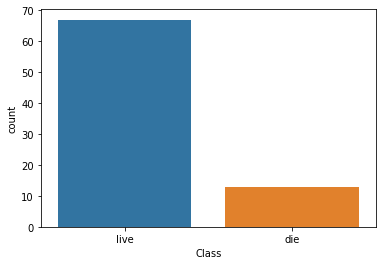

In [65]:
sns.countplot('Class',data=new_data)

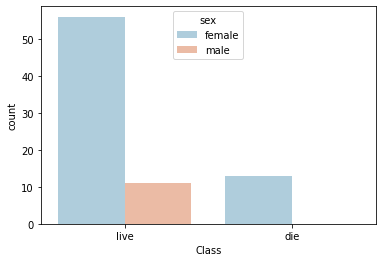

In [138]:
sns.countplot(x='Class',hue='sex',data=new_data,palette='RdBu_r')

In [80]:
#independent and dependent features
X=new_data.drop(['Class'],axis=1)
y=new_data.Class

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [84]:
#oversampling
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.5)
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("no of classes before os{}".format(Counter(y_train)))
print("no of classes after os{}".format(Counter(y_train_ns)))

no of classes before osCounter({'live': 47, 'die': 9})
no of classes after osCounter({'live': 47, 'die': 23})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [109]:
for col in new_data.columns:
  print(col,' :',len(new_data[col].unique()),'labels')

age  : 40 labels
sex  : 2 labels
steroid  : 2 labels
antivirals  : 2 labels
fatigue  : 2 labels
malaise  : 2 labels
anorexia  : 2 labels
liver_big  : 2 labels
liver_firm  : 2 labels
spleen_palpable  : 2 labels
spiders  : 2 labels
ascites  : 2 labels
varices  : 2 labels
bilirubin  : 23 labels
alk_phosphate  : 59 labels
sgot  : 58 labels
albumin  : 24 labels
protime  : 42 labels
histology  : 2 labels
Class  : 2 labels


In [114]:
#label encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
label = new_data.iloc[:200,-1]
original=label.unique() 
label=label.values
label2 = labelencoder.fit_transform(label)
y1=pd.DataFrame(label2,columns=["Class"])
numeric=y1["Class"].unique() 
y2 = pd.DataFrame({'Class':original, 'Corresponding Number':numeric})
print(y2)

  Class  Corresponding Number
0  live                     1
1   die                     0


In [121]:
x1=new_data.iloc[:,:-1].values
z=pd.DataFrame(x1)
print(z)

    0       1      2      3      4      5   ...   13   14   15   16  17     18
0   34  female   True  False  False  False  ...  0.9   95   28    4  75  False
1   39  female  False   True  False  False  ...  1.3   78   30  4.4  85  False
2   32  female   True   True   True  False  ...    1   59  249  3.7  54  False
3   41  female   True   True   True  False  ...  0.9   81   60  3.9  52  False
4   30  female   True  False   True  False  ...  2.2   57  144  4.9  78  False
..  ..     ...    ...    ...    ...    ...  ...  ...  ...  ...  ...  ..    ...
75  45  female   True   True  False  False  ...  1.3   85   44  4.2  85   True
76  49  female  False  False   True   True  ...  1.4   85   70  3.5  35   True
77  31  female  False  False   True  False  ...  1.2   75  173  4.2  54   True
78  53    male  False  False   True  False  ...  1.5   81   19  4.1  48   True
79  43  female   True  False   True  False  ...  1.2  100   19  3.1  42   True

[80 rows x 19 columns]


In [122]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label_encoder= LabelEncoder()
x1[:,1]= label_encoder.fit_transform(x1[:,1])
x1[:,2]= label_encoder.fit_transform(x1[:,2])  
x1[:,3]= label_encoder.fit_transform(x1[:,3]) 
x1[:,4]= label_encoder.fit_transform(x1[:,4]) 
x1[:,5]= label_encoder.fit_transform(x1[:,5]) 
x1[:,6]= label_encoder.fit_transform(x1[:,6]) 
x1[:,7]= label_encoder.fit_transform(x1[:,7]) 
x1[:,8]= label_encoder.fit_transform(x1[:,8]) 
x1[:,9]= label_encoder.fit_transform(x1[:,9]) 
x1[:,10]= label_encoder.fit_transform(x1[:,10]) 
x1[:,11]= label_encoder.fit_transform(x1[:,11]) 
x1[:,12]= label_encoder.fit_transform(x1[:,12]) 
x1[:,18]= label_encoder.fit_transform(x1[:,18]) 
z=pd.DataFrame(x1)
print(z.head())

   0  1  2  3  4  5  6  7  8  9  10 11 12   13  14   15   16  17 18
0  34  0  1  0  0  0  0  1  0  0  0  0  0  0.9  95   28    4  75  0
1  39  0  0  1  0  0  0  0  1  0  0  0  0  1.3  78   30  4.4  85  0
2  32  0  1  1  1  0  0  1  1  0  1  0  0    1  59  249  3.7  54  0
3  41  0  1  1  1  0  0  1  1  0  0  0  0  0.9  81   60  3.9  52  0
4  30  0  1  0  1  0  0  1  1  0  0  0  0  2.2  57  144  4.9  78  0


In [123]:
z.columns=['age',	'sex','steroid','antivirals','fatigue',	'malaise','anorexia','liver_big',	'liver_firm',
           'spleen_palpable','spiders','ascites','varices','bilirubin','alk_phosphate','sgot','albumin','protime','histology'	]

In [124]:
z

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,34,0,1,0,0,0,0,1,0,0,0,0,0,0.9,95,28,4,75,0
1,39,0,0,1,0,0,0,0,1,0,0,0,0,1.3,78,30,4.4,85,0
2,32,0,1,1,1,0,0,1,1,0,1,0,0,1,59,249,3.7,54,0
3,41,0,1,1,1,0,0,1,1,0,0,0,0,0.9,81,60,3.9,52,0
4,30,0,1,0,1,0,0,1,1,0,0,0,0,2.2,57,144,4.9,78,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,45,0,1,1,0,0,0,1,0,0,0,0,0,1.3,85,44,4.2,85,1
76,49,0,0,0,1,1,0,1,0,1,1,0,0,1.4,85,70,3.5,35,1
77,31,0,0,0,1,0,0,1,0,0,0,0,0,1.2,75,173,4.2,54,1
78,53,1,0,0,1,0,0,1,0,1,1,0,1,1.5,81,19,4.1,48,1


In [127]:
#feature selection
import seaborn as sns
corr=new_data.corr()

In [128]:
corr

,age,antivirals,bilirubin,alk_phosphate,sgot,albumin,protime,histology
age,1.000000,0.043308,0.160752,0.088183,-0.132269,-0.220464,-0.190169,0.310650
antivirals,0.043308,1.000000,-0.200767,-0.203513,-0.141556,0.252072,-0.007032,-0.211362
bilirubin,0.160752,-0.200767,1.000000,0.316916,0.315108,-0.343683,-0.362055,0.233525
alk_phosphate,0.088183,-0.203513,0.316916,1.000000,0.349342,-0.409635,-0.212012,0.245068
sgot,-0.132269,-0.141556,0.315108,0.349342,1.000000,-0.113103,-0.144540,0.097489
albumin,-0.220464,0.252072,-0.343683,-0.409635,-0.113103,1.000000,0.434659,-0.396554
protime,-0.190169,-0.007032,-0.362055,-0.212012,-0.144540,0.434659,1.000000,-0.276935
histology,0.310650,-0.211362,0.233525,0.245068,0.097489,-0.396554,-0.276935,1.000000


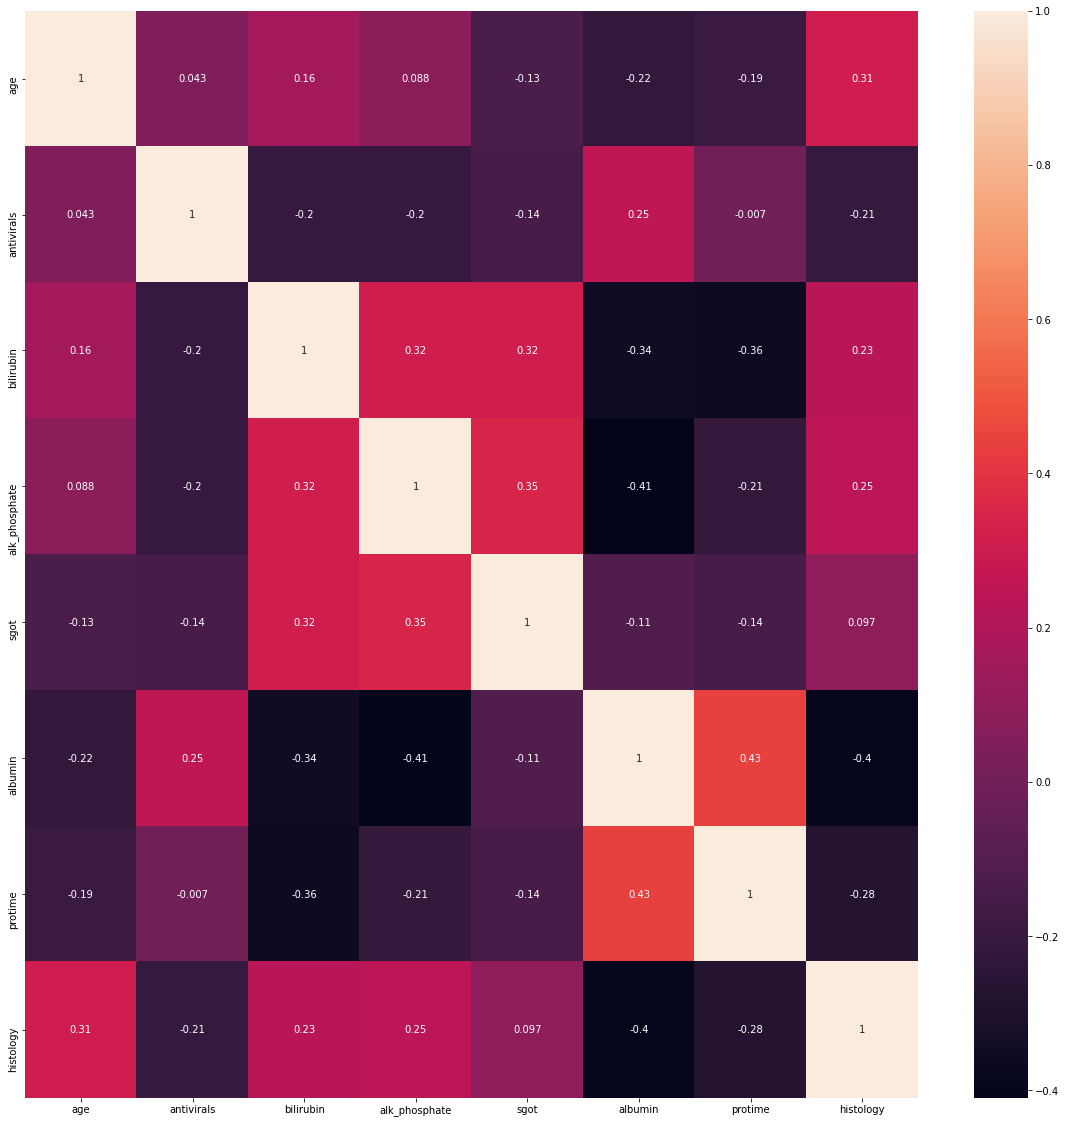

In [96]:
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(new_data[top_features].corr(),annot=True)